In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
datasets = [pd.read_csv(i) for i in [f"https://raw.githubusercontent.com/Piyush23110247/ES114_Probability/main/{j}.csv" for j in range(2000,2024)]]
atp_players=pd.read_csv(f"https://raw.githubusercontent.com/Piyush23110247/ES114_Probability/main/atp_players.csv")

In [ ]:
data_2016=datasets[16]

In [ ]:
concat_data=pd.concat(datasets)

**Question 1**

Matches played in different years on different surfaces.

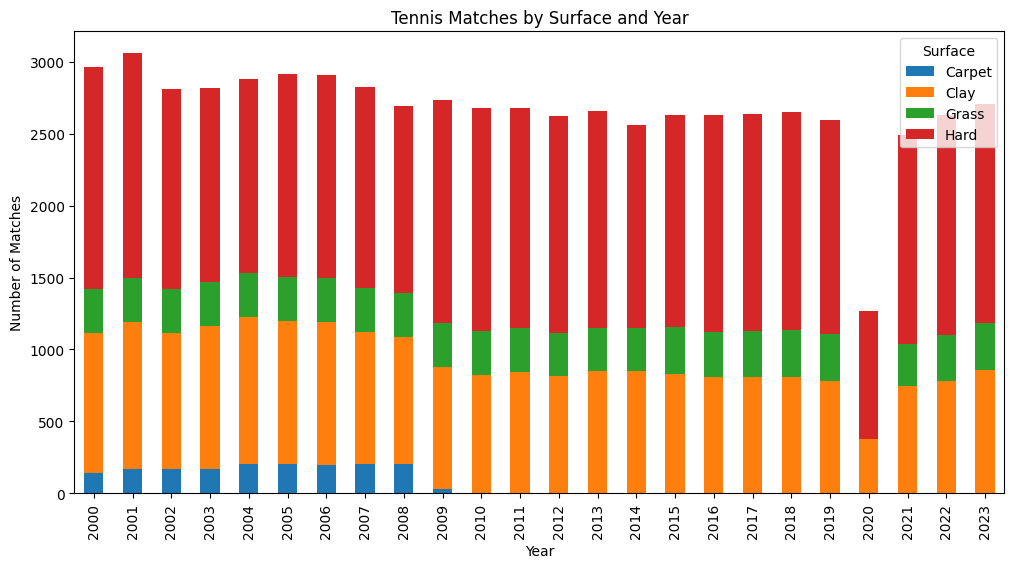

In [ ]:
concat_data['year'] = pd.to_datetime(concat_data['date']).dt.year

surface_by_year = pd.crosstab(concat_data['year'], concat_data['surface'])
surface_by_year.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.title('Tennis Matches by Surface and Year')
plt.legend(title='Surface')
plt.show()

**Question 2**

Plot a graph of number of matches played per tournament in the year 2010.

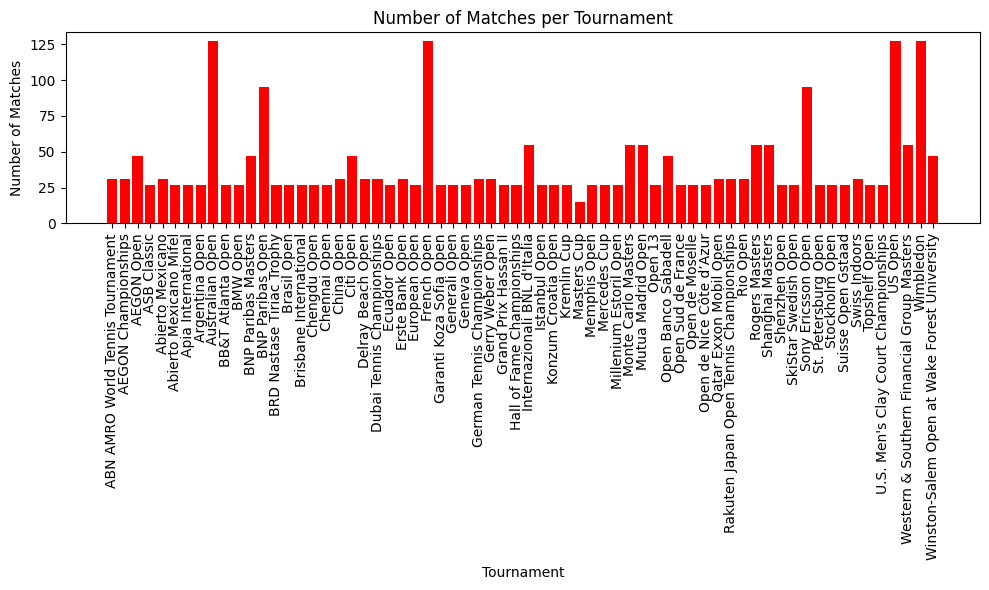

In [ ]:
matches_per_tournament = data_2016.groupby('tournament')['winner'].count().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(matches_per_tournament['tournament'], matches_per_tournament['winner'], color='Red')
plt.xticks(rotation=90)
plt.xlabel('Tournament')
plt.ylabel('Number of Matches')
plt.title('Number of Matches per Tournament')
plt.tight_layout()
plt.show()

**Question 3**

How does performance of Federer R. varies with respect to surfaces on which the match is played ?

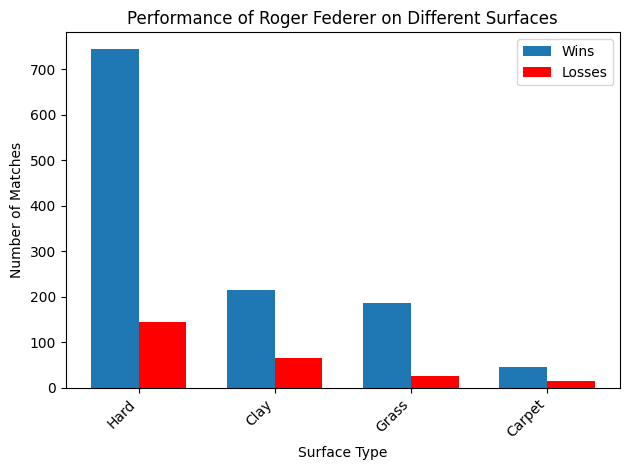

In [ ]:
federer_matches = concat_data[concat_data['winner'].str.contains('Federer R.') | concat_data['loser'].str.contains('Federer R.')]

wins = federer_matches[federer_matches['winner'].str.contains('Federer R.')]['surface'].value_counts().reset_index(name='Wins')
losses = federer_matches[federer_matches['loser'].str.contains('Federer R.')]['surface'].value_counts().reset_index(name='Losses')

count_concat_data = pd.merge(wins, losses, on='surface', how='outer')
count_concat_data.fillna(0, inplace=True)

bar_width = 0.35
plt.bar(count_concat_data.index, count_concat_data['Wins'], bar_width, label='Wins')
plt.bar(count_concat_data.index + bar_width, count_concat_data['Losses'], bar_width, label='Losses', color='red')
plt.xlabel('Surface Type')
plt.ylabel('Number of Matches')
plt.title('Performance of Roger Federer on Different Surfaces')
plt.xticks(count_concat_data.index + bar_width / 2, count_concat_data['surface'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

**Question 4**

Plot the number of matches won with Odds Against them.

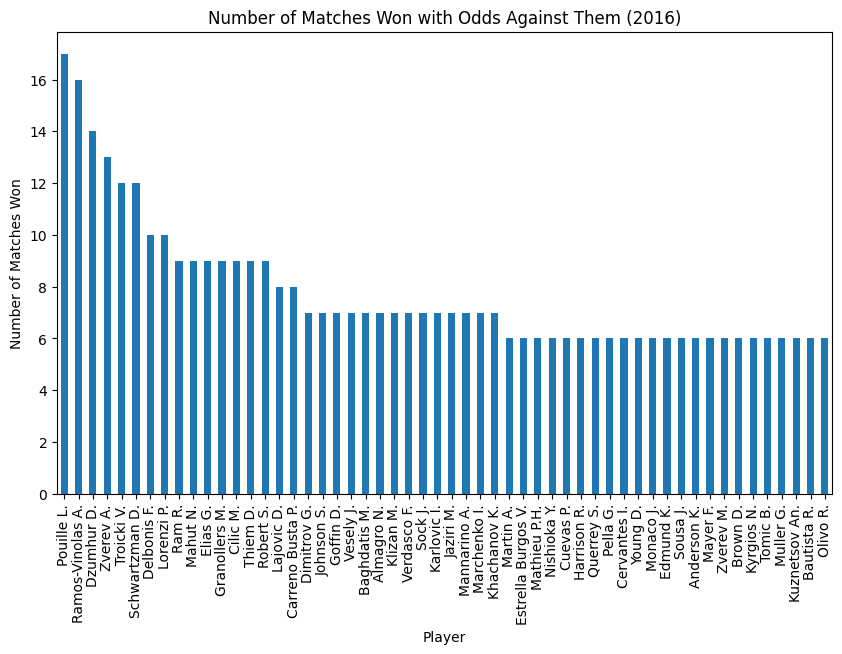

In [ ]:
data_2016=datasets[16]
winner_odds_against = data_2016[data_2016['b365w'] > data_2016['b365l']]

player_win = winner_odds_against['winner'].value_counts()
player_wins = player_win[player_win > 5]

plt.figure(figsize=(10, 6))
player_wins.plot(kind='bar')
plt.title('Number of Matches Won with Odds Against Them (2016)')
plt.xlabel('Player')
plt.ylabel('Number of Matches Won')
plt.xticks(rotation=90)
plt.show()


**Questions 5**

Plot most correct match predictions Vs Bookers.

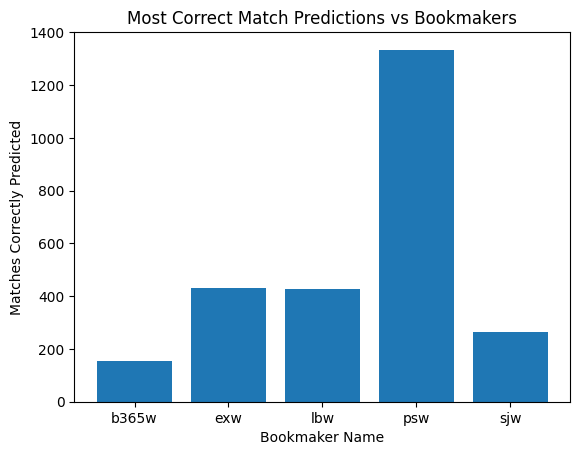

In [ ]:
data_2011 = datasets[11]
x = data_2011[['b365w', 'exw', 'lbw',  'psw', 'sjw']].dropna()
bookers = list(x.columns)
correct_predictions = dict.fromkeys(bookers, 0)
for r in x.iterrows():
    l = list(r[1].to_numpy())
    correct_predictions[bookers[l.index(max(l))]] += 1

booker_names = []
correct_counts = []
for i, j in correct_predictions.items():
    booker_names.append(i)
    correct_counts.append(j)

plt.bar(booker_names, correct_counts)
plt.xlabel('Bookmaker Name')
plt.ylabel('Matches Correctly Predicted')
plt.title('Most Correct Match Predictions vs Bookmakers')
plt.show()


**Question 6**

Plot the  different types of rounds reached by players from year 2000 to 2024.

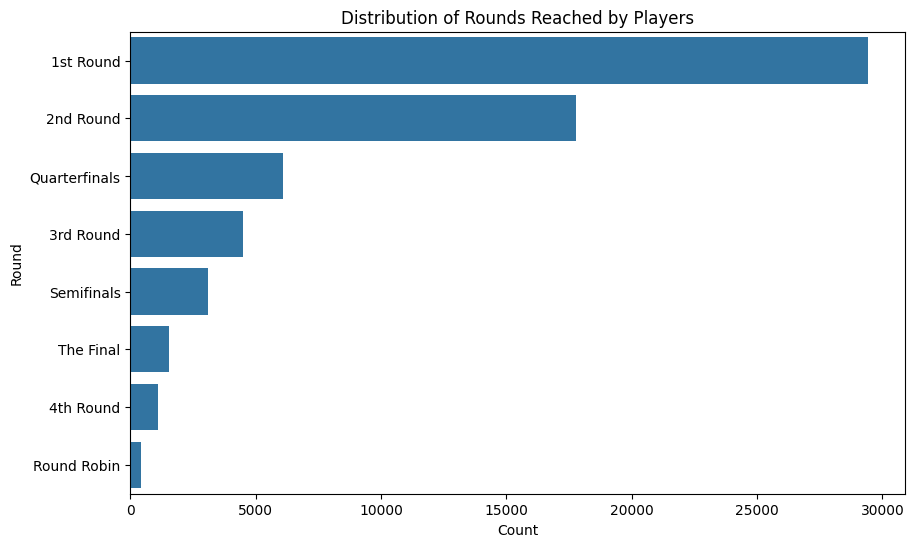

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y='round', data=concat_data, order=concat_data['round'].value_counts().index)
plt.xlabel('Count')
plt.ylabel('Round')
plt.title('Distribution of Rounds Reached by Players')
plt.show()

**Question 7**

Fnd out if there are upsets and if there are find out how many.

In [ ]:
data_2016['wrank'] = pd.to_numeric(data_2016['wrank'], errors='coerce')
data_2016['lrank'] = pd.to_numeric(data_2016['lrank'], errors='coerce')
upsets = data_2016[data_2016['lrank'] < data_2016['wrank']]
total_matches = len(data_2016)
total_upsets = len(upsets)
upset_rate = total_upsets / total_matches
upset_surface_distribution = upsets['surface'].value_counts()

print("Total Upsets:", total_upsets)
print("Upset Rate:",upset_rate)

Total Upsets: 862
Upset Rate: 0.32825590251332826


**Question 8**

Find the mean height, height variance and height standard deviation from the playerdata.

In [ ]:
data_players = atp_players[atp_players['height_cm'] != 0].copy()

data_players.dropna(subset=['height_cm'], inplace=True)

mean_height = data_players['height_cm'].mean()
height_variance = data_players['height_cm'].var()
height_std_dev = data_players['height_cm'].std()

print("Mean Height:", mean_height)
print("Height Variance:", height_variance)
print("Height Standard Deviation:", height_std_dev)


Mean Height: 183.87632508833923
Height Variance: 55.89789568060757
Height Standard Deviation: 7.476489529224766


**Question 9**

No of matches won by any player in 2016 provided they have minimum 10 wins

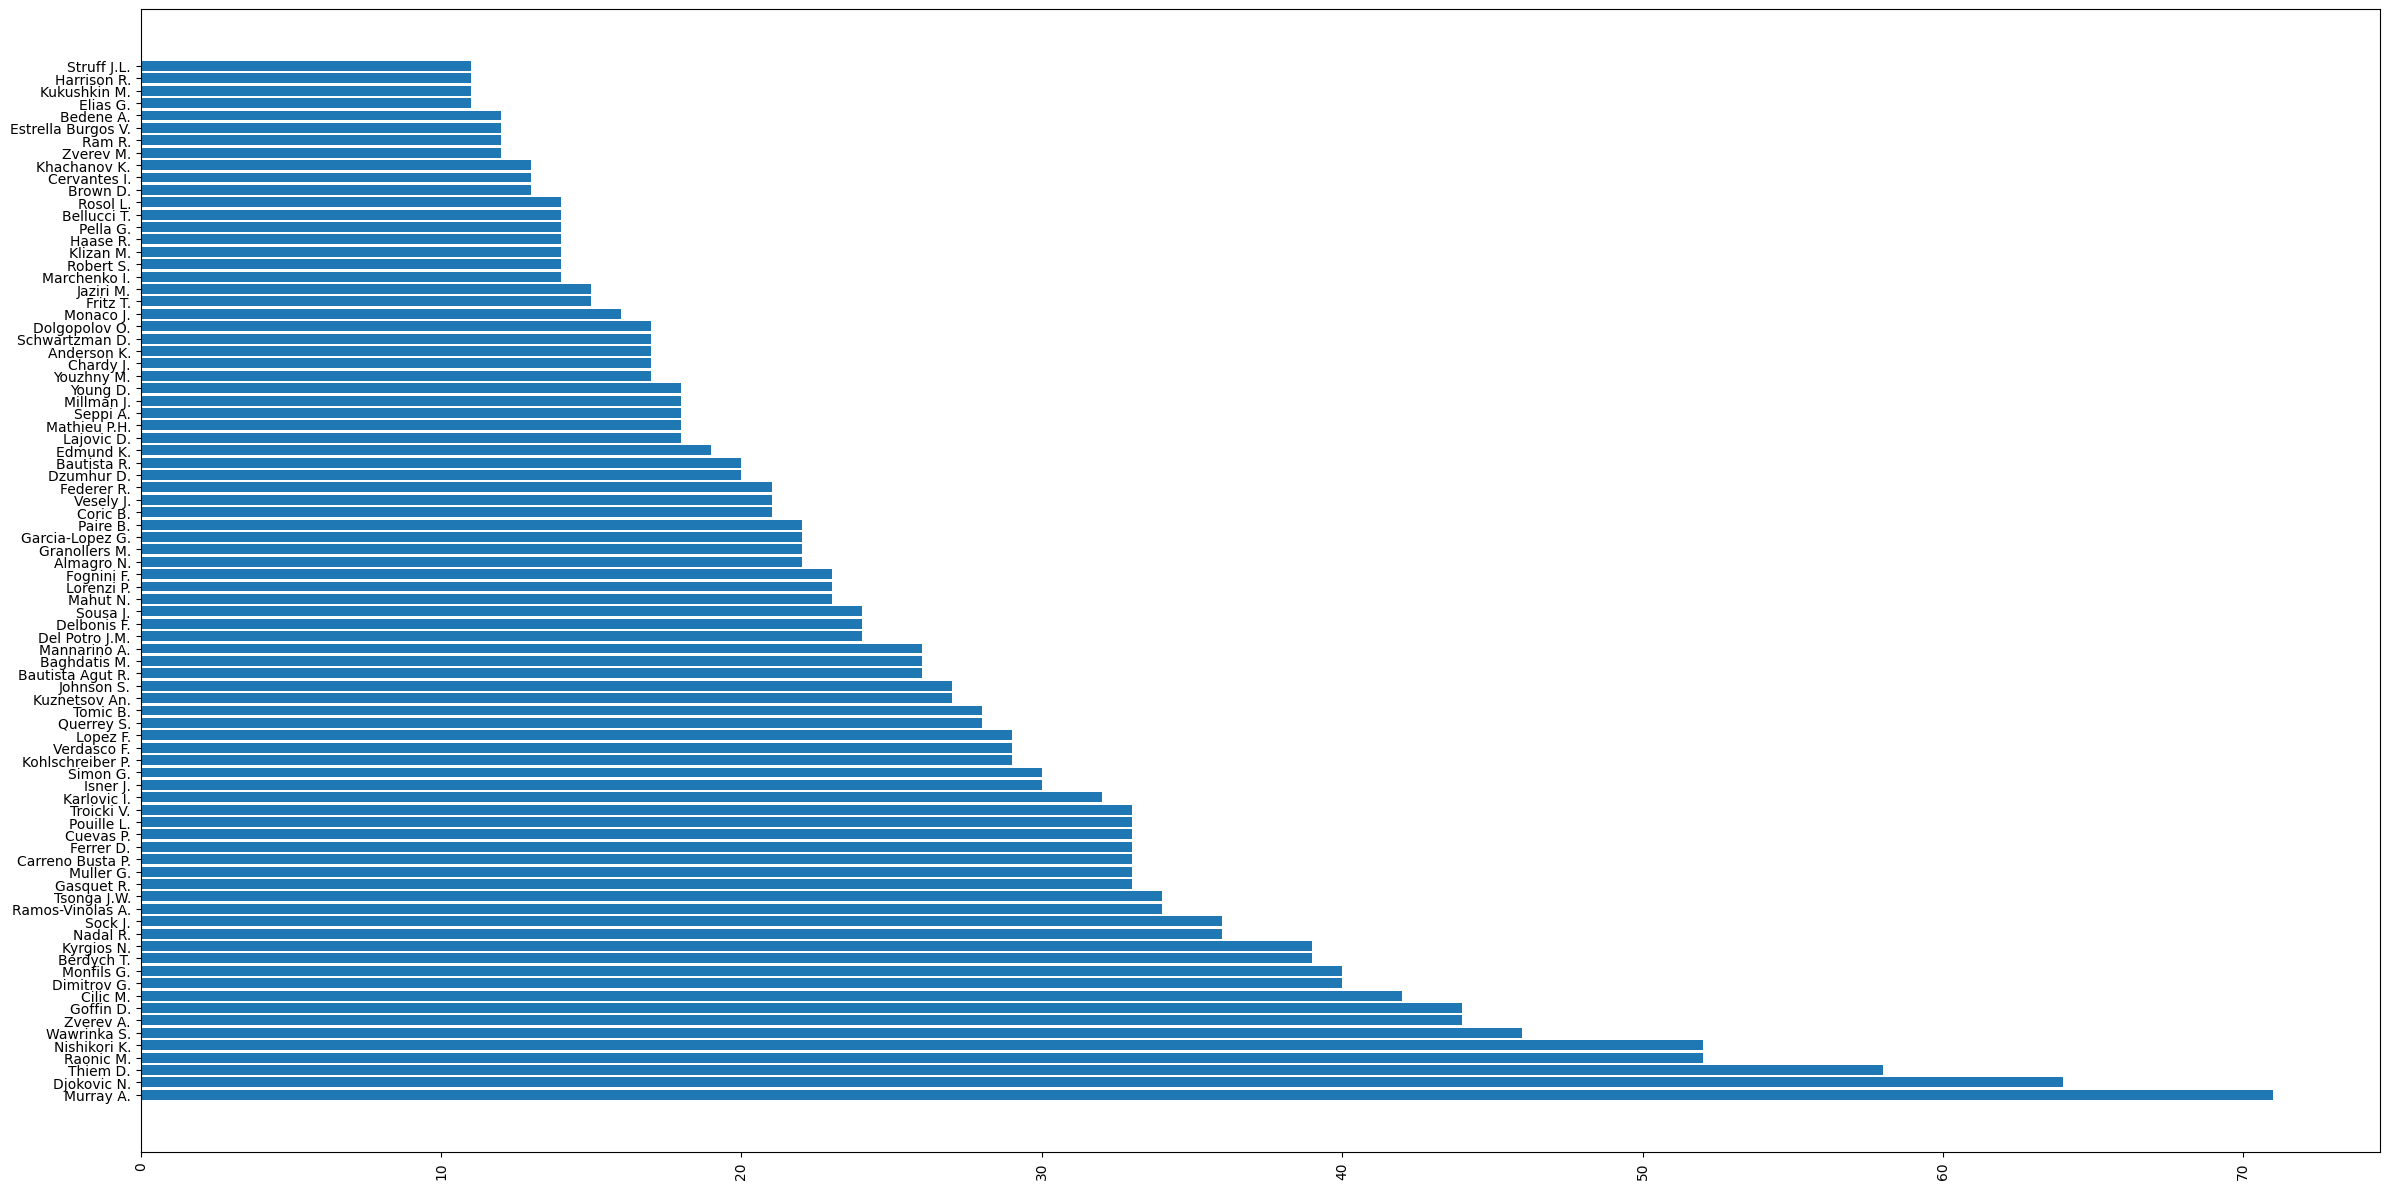

In [ ]:
winners = list(data_2016["winner"].unique())
wins = data_2016["winner"].value_counts()
new_wins = wins[wins>10]
plt.figure(figsize=(24,12))
plt.barh(new_wins.index,new_wins.values)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Question 10**

Plot number of Finals Played by Each Player in 2016

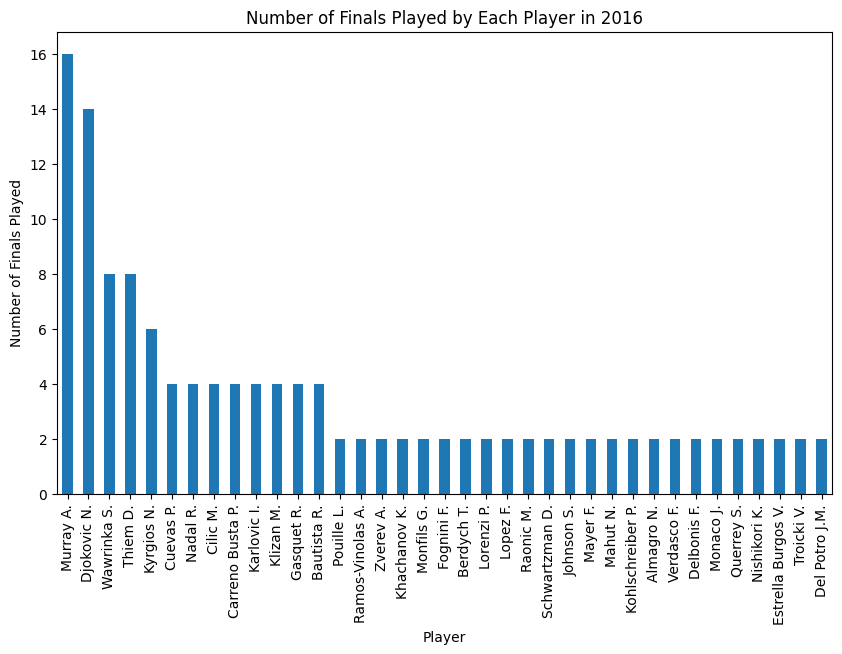

In [ ]:
finals = data_2016[data_2016['round'] == 'The Final']
finals_won = finals['winner'].value_counts()
finals_lost = finals["winner"].value_counts()
finals_played = finals_won + finals_lost
plt.figure(figsize=(10, 6))
finals_played.plot(kind='bar')
plt.xlabel('Player')
plt.ylabel('Number of Finals Played')
plt.title('Number of Finals Played by Each Player in 2016')
plt.xticks(rotation=90)
plt.show()

**Note**

Discussed with 23110007